World Happiness Report
Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Note: You can find the dataset in the link below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### 1. Identification of variables and data types

In [3]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

1. Columns Country and Region are string objects and do not contribute to the traget data.
2. Columns Happiness rank is thr outcome of the target column data.
3. Happiness score is our target data.
4. Standard Error and Dystopia Residual are subtracted directly from the happiness socre, so they also wont be considred as factors for our model.
5. Columns economy, family, health, freedom, trust and generosity will form the facotrs of our model.

### 2. Analyzing the basic metrics

In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### 3. Non-Graphical Univariate Analysis

1. No much deviation is seen between mean and median, so the skewness is very less, except for Trust column and standard error column.
2. Difference between quantiles shows that the spread is low and outliers are also less.


In [5]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

### 4. Checking for missing values from dataframe.

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null values present in the dataset

In [7]:
x=0
for i in df["Country"]:
    if i == " ":
        x=x+1
    else:
        continue
print(x)
y=0
for i in df["Region"]:
    if i == " ":
        y=y+1
    else:
        continue
print(y)

0
0


Two columns Country and Region has string/object values, so checked for empty spaces in those two columns and found that no empty spaces are present.
No need to chck for empty spaces in float/int columns.

### 5. Graphical Univariate Analysis

In [8]:
%matplotlib inline

In [9]:
#Setting the display for our graph display

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams ['figure.figsize'] = (10, 7)
plt.rcParams ['figure.facecolor'] = '#FFE5B4'

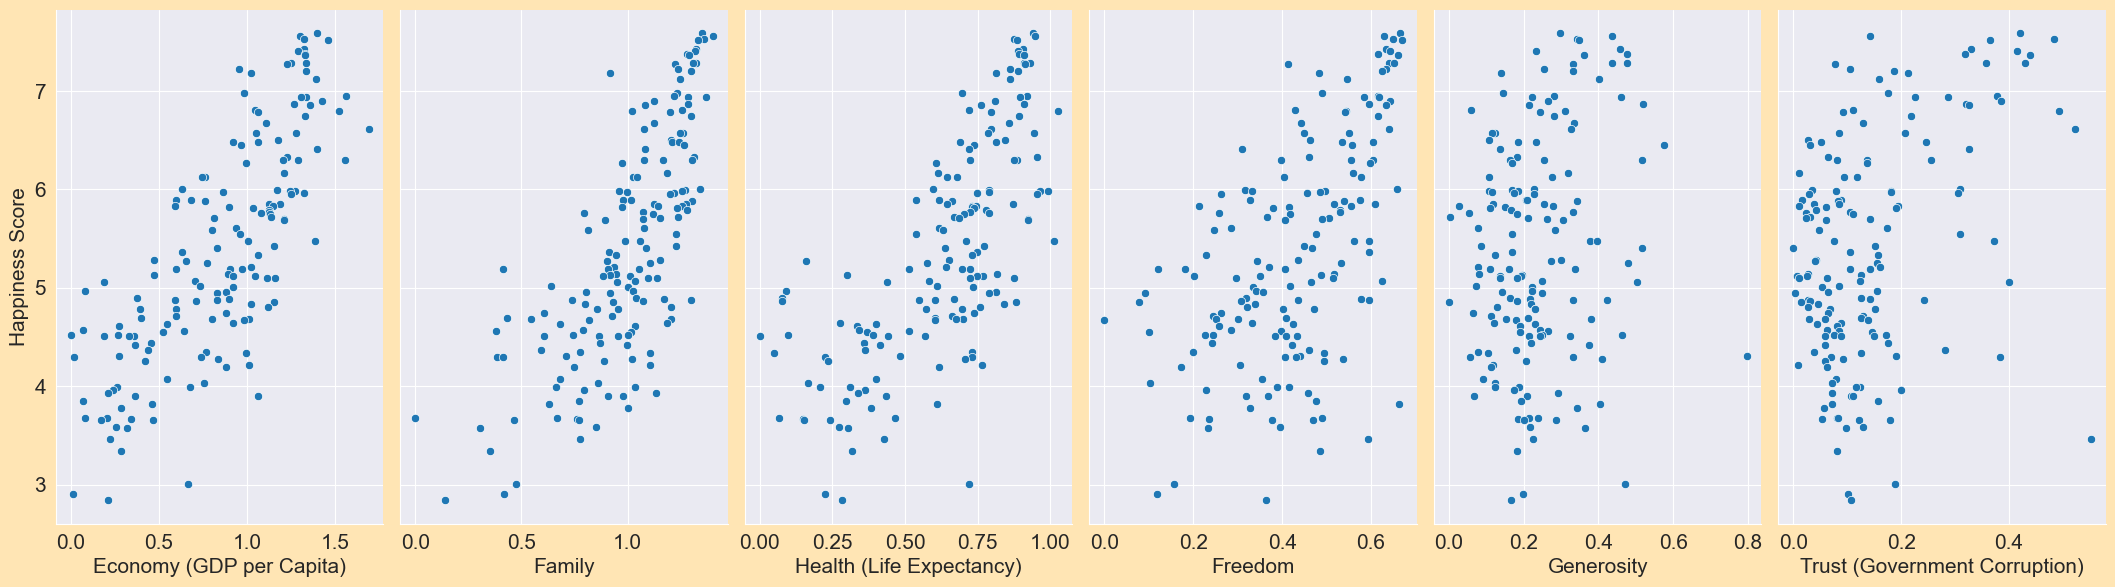

In [10]:
sns.pairplot(df, x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)'], y_vars='Happiness Score', height=6, aspect=.6)

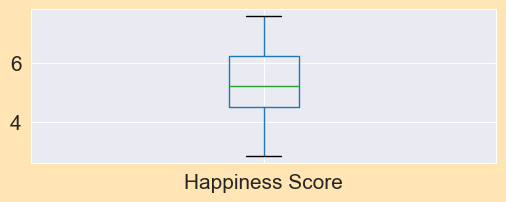

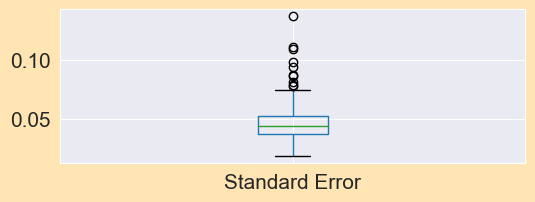

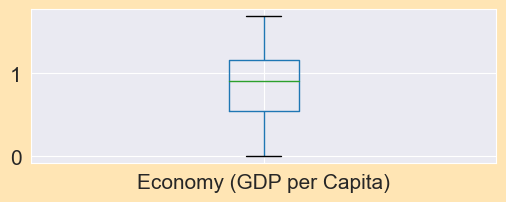

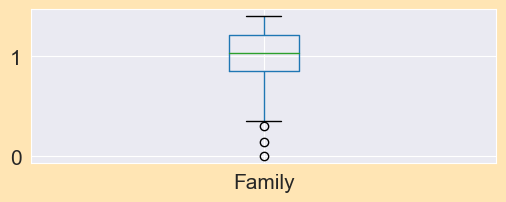

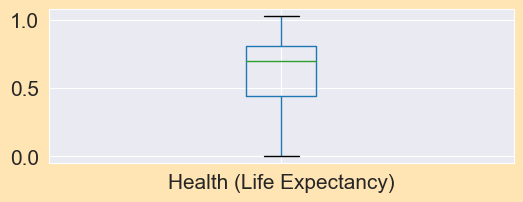

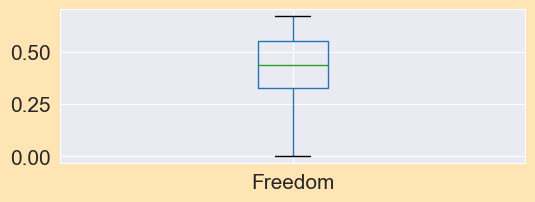

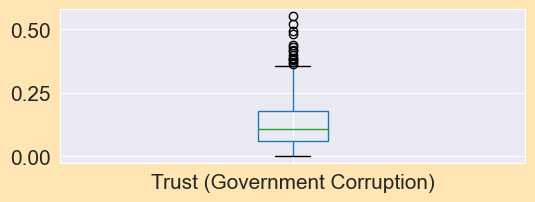

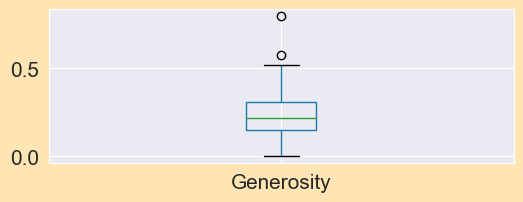

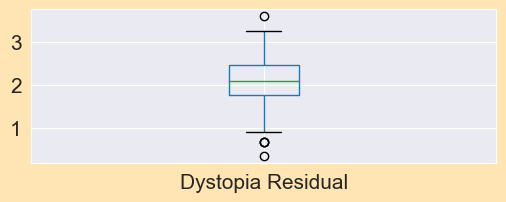

In [11]:
for column in df.iloc[ : , 3:]:
    plt.figure(figsize=(6,2))
    df.boxplot([column])

Upon analysis we found out that most of the columns does not have any outliers excpet standard error, family and trust columns.
The central tendency of columns is also not much deviated and aligns with the mid quartile.

### 6. Multivariate Analysis

<AxesSubplot:title={'center':'Plot between Happiness Score and GDP'}, xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

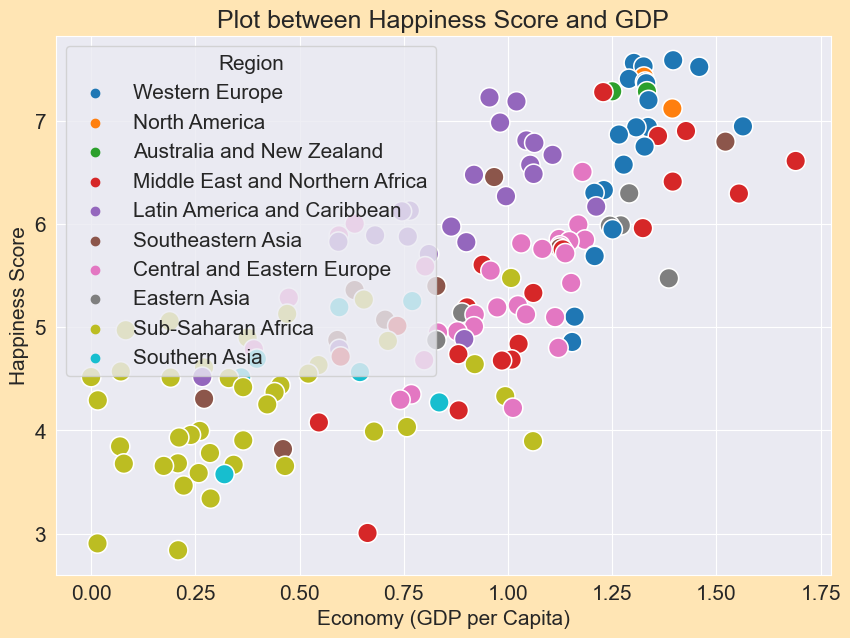

In [12]:
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = "Economy (GDP per Capita)", y = "Happiness Score", hue = "Region", s = 200, data=df)

We can infer from here that 
1. happiness socre is directly proportional to the GDP of a country which includes mostly European Countries.
2. Latin America and Caribbean countries have a better happiness score ven with slighlty lesser GDP.
3. Middle East and Northern Africa countries have a lower Happiness score even with a good GDP.

In [13]:
gdp_region = df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0.5, 1.0, 'GDP by Region')

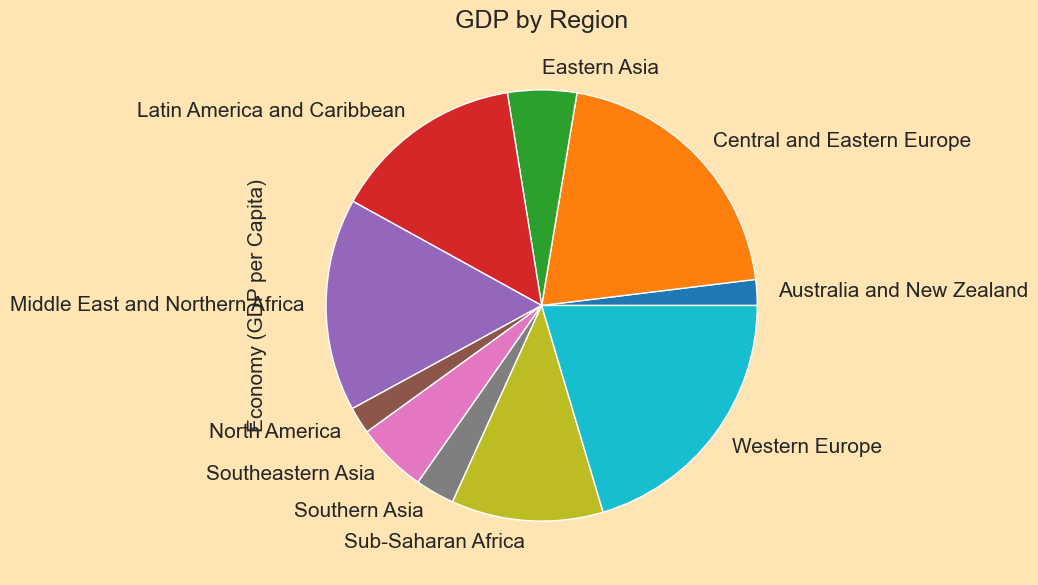

In [14]:
gdp_region.plot.pie()
plt.title('GDP by Region')

In [15]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

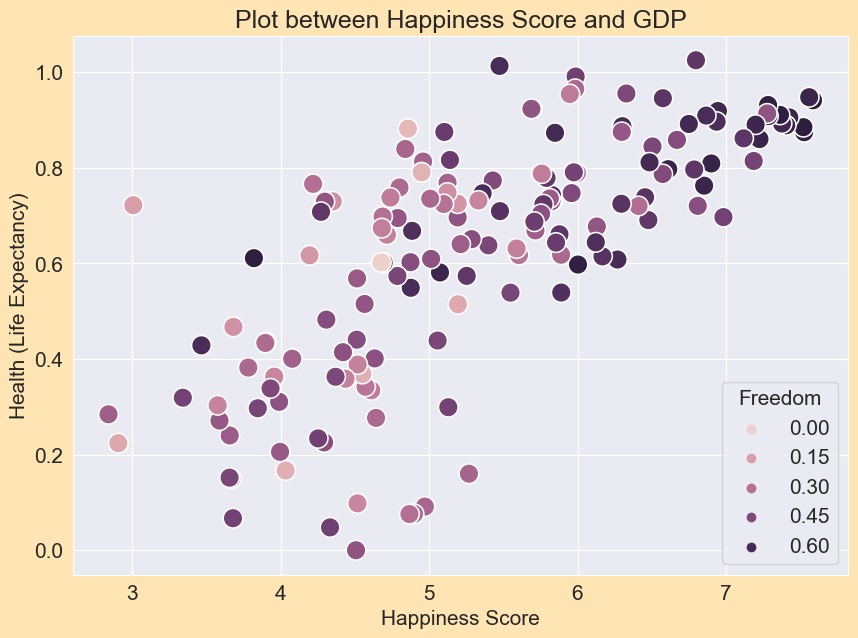

In [16]:
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = "Happiness Score", y = "Health (Life Expectancy)", hue = "Freedom", s = 200, data=df);

We can infer from here that :
1. Even if the freedom is higher, but happiness score is low if the health of the people is not good.
2. Freedom factor has low impact on the happiness score.

### 7. Encoding the categorical Data

 There is no categorical data in columns so no need of encoding.

### 8. Outlier treatment

Before the outlier treatment we must remove the columns with string values which have no significance in the output.

So removing columns Country, Region, Happiness Rank.

Also removing Standard Error and Dystopia Residual  as they are not used in machine learning but arithmatic computation.

In [17]:
df["Happiness_corrected"]=df["Happiness Score"]-df["Standard Error"]-df["Dystopia Residual"]

In [18]:
df_n=df

In [19]:
df_n.drop(["Country", "Region", "Happiness Rank", "Standard Error", "Dystopia Residual"], inplace=True, axis=1)

In [20]:
z=np.abs(zscore(df_n))
dfn=df_n[(z<3).all(axis=1)]
dfn

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness_corrected
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,5.03551
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,4.81015
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,5.00168
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,5.01789
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,4.93971
...,...,...,...,...,...,...,...,...
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,2.07882
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.59206
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.67016
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2.62727


In [21]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness_corrected
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,5.03551
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,4.81015
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,5.00168
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,5.01789
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,4.93971
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2.75994
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.67016
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2.62727
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,0.98540


158-153=5, SO lost less than 5% of the data while removing outliers which is acceptable

### 9. Variable transformations

In [22]:
#Checking skewness
dfn.skew()

Happiness Score                  0.133600
Economy (GDP per Capita)        -0.392269
Family                          -0.803145
Health (Life Expectancy)        -0.741582
Freedom                         -0.397454
Trust (Government Corruption)    1.280533
Generosity                       0.636850
Happiness_corrected              0.086734
dtype: float64

In [23]:
dfn["Trust (Government Corruption)"]=np.cbrt(dfn["Trust (Government Corruption)"])

In [24]:
dfn.skew()

Happiness Score                  0.133600
Economy (GDP per Capita)        -0.392269
Family                          -0.803145
Health (Life Expectancy)        -0.741582
Freedom                         -0.397454
Trust (Government Corruption)   -0.055171
Generosity                       0.636850
Happiness_corrected              0.086734
dtype: float64

Skewness of all other columns is acceptable so not making any changes in them.

### 10. Correlation Analysis

<AxesSubplot:>

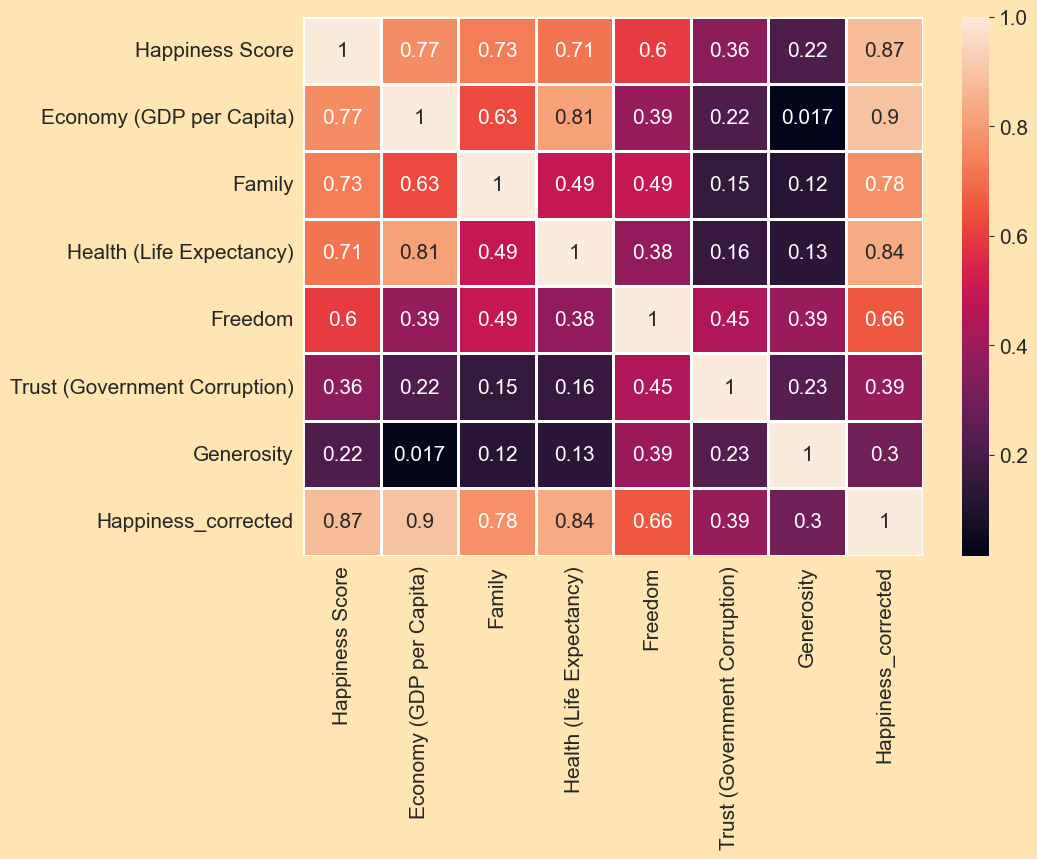

In [25]:
# To find multicolinearity
dfc=dfn.corr()
sns.heatmap(dfc, annot= True, linewidths=0.75)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(dfn.iloc[:,1:-1].values,i) for i in range(dfn.iloc[:,1:-1].shape[1])]
vif["features"]=dfn.iloc[:,1:-1].columns
print(vif)

   VIF Factor                       features
0   21.325645       Economy (GDP per Capita)
1   20.597569                         Family
2   22.665180       Health (Life Expectancy)
3   16.429989                        Freedom
4   11.696960  Trust (Government Corruption)
5    5.995111                     Generosity


Though VIF is very high but we would not remove any columns as number of columns is very less, and removing any would result in substantial data loss.

### 11. Dimensionality Reduction

Dimensionality Reduction-- testing using ANOVA

In [27]:
a=[]
for i in dfn.columns:
    for j in dfn.columns:
        try:
            F, p = stats.f_oneway(dfn[f'{j}'],dfn[f'{i}'])
           # print(f"relation of {j} with {i}","\n","F =",F,"p=",p)
            if p>0.05 and p!=1:
                a.append(f"relation of {j} with {i} F = {F} and p= {p}")
        except:
            F, p = stats.f_oneway(dfn[{j}],dfn[{i}])
            if p>0.05 and p!=1:
                a.append(f"relation of {j} with {i} F = {F} and p= {p}")
            
            #print(f"relation of {j} with {i}","\n","F =",F,"p=",p)
    
            
a

[]

No columns have relational value of p more than 0.05, so ANOVA test is passed.

### 12. No resampling needed as it is a regressor model

### 13.Scaling of Independent features

In [28]:
X=dfn.iloc[:,1:-1]
Y=dfn.iloc[:,-1]
st=StandardScaler()
x=st.fit_transform(X)
Xf=pd.DataFrame(data=x, columns=X.columns)

### Preparing data for modelling

In [29]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(Xf,Y,test_size=0.2,random_state=15)

In [30]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(122, 6) (122,)
(31, 6) (31,)


### Training and testing of data

In [31]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [32]:
model=[lr,lasso,svr,dtr,rfr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    print("==============================================\n\n\n====================================================")

Scores for LinearRegression() are
Mean Absolute Error: 0.03702834114493881
Mean Squared Error: 0.0036779416883507138
Root Mean Squared Error: 0.060646036048126954
R squared score:  0.9958397374828473
Cross Validation Score is : [0.99917078 0.99694511 0.99853262 0.99819646 0.99899063]
Mean Score : 0.998367118845796
Difference : 0.002527381362948722


Scores for Lasso() are
Mean Absolute Error: 0.7687288101533583
Mean Squared Error: 0.8846926081784485
Root Mean Squared Error: 0.9405809950123639
R squared score:  -0.00071012780448787
Cross Validation Score is : [-2.94789748e-02 -1.20237256e-01 -2.62543931e-03 -2.25848775e-02
 -5.81248143e-08]
Mean Score : -0.03498532111684662
Difference : -0.03427519331235875


Scores for SVR() are
Mean Absolute Error: 0.12712858719602294
Mean Squared Error: 0.0446180552241014
Root Mean Squared Error: 0.21122986347602793
R squared score:  0.949530786927642
Cross Validation Score is : [0.98618694 0.97824429 0.98188249 0.97239735 0.96688992]
Mean Score : 0.

#### We can infer that Linear regression shows the best results.

R squared score:  0.9958397374828473

Mean CV Score : 0.998367118845796

And difference is minimum.

### This is the best result so we will save this model

In [33]:
import joblib
joblib.dump(lr,"HI_LR.obj")

['HI_LR.obj']